## Frost Number Model

### Introduction to Permafrost Processes - Lesson 1

This lab has been designed and developed by Irina Overeem and Mark Piper, CSDMS, University of Colorado, CO 
with assistance of Kang Wang, Scott Stewart at CSDMS, University of Colorado, CO, and Elchin Jafarov, at Los Alamos National Labs, NM. 
These labs are developed with support from NSF Grant 1503559, ‘Towards a Tiered Permafrost Modeling Cyberinfrastructure’ 

### Classroom organization

This lab is the first in a series of introduction to permafrost process modeling, designed for inexperienced users. In this first lesson, we explore the Air Frost Number model and learn to use the CSDMS Python Modeling Toolkit ([PyMT](https://github.com/csdms/pymt)). We implemented a basic configuration of the Air Frost Number (as formulated by Nelson and Outcalt in 1987). This series of labs is designed for inexperienced modelers to gain some experience with running a numerical model, changing model inputs, and analyzing model output. Specifically, this first lab looks at what controls permafrost occurrence and compares the occurrence of permafrost in Russia. 
Basic theory on the Air Frost Number is presented in [Frost Number Model Lecture 1](https://csdms.colorado.edu/wiki/File:FrostNumberModel_Lecture1.pptx).


This lab will likely take ~ 1,5 hours to complete in the classroom. This time assumes you are unfamiiar with the PyMT and need to learn setting parameters, saving runs, downloading data and looking at output (otherwise it will be much faster).

We will use netcdf files for output, this is a standard output from all CSDMS models. If you have no experience with visualizing these files, Panoply software will be helpful. Find instructions on how to use this software.

### Learning objectives

#### Skills

* familiarize with a basic configuration of the Air Frost Number Model
* hands-on experience with visualizing NetCDF output with Panoply.


#### Topical learning objectives:

* what is the primary control on the occurrence of permafrost
* freezing and thawing day indices and how to approximate these
* where in Russia permafrost occurs

### References and More information 

Nelson, F.E., Outcalt, S.I., 1987. *A computational method for prediction and prediction and regionalization of permafrost.* Arct. Alp. Res. 19, 279–288.  
Janke, J., Williams, M., Evans, A., 2012. *A comparison of permafrost prediction models along a section of Trail Ridge Road, RMNP, CO.* Geomorphology 138, 111-120.


### The Air Frost number

The Air Frost number uses the mean annual air temperature of a location (MAAT), as well as the yearly temperature amplitude. In the Air Frost parametrization the Mean monthly temperature of the warmest month (Tw) and coldest month (Tc) set that amplitude. The 'degree thawing days' are above 0 C, the 'degree freezing days' are below 0 C. To arrive at the cumulative freezing degree days and thawing degree days the annual temperature curve is approximated by a cosine as defined by the warmest and coldest months, and one can integrate under the cosine curve (see figure, and more detailed notes in the associated presentation).

![MAAT](https://csdms.colorado.edu/mediawiki/images/thumb/CosineapproximationMAAT.png/594px-CosineapproximationMAAT.png "Mean Annual Air Temperature")

In [1]:
import numpy as np
import pandas

import matplotlib.pyplot as plt

import pymt

✓ Avulsion
✓ Plume
✓ Sedflux3D
✓ Subside
✓ FrostNumber
✓ Ku
✓ Hydrotrend
✓ Child
✓ Cem
✓ Waves


In [2]:
frost_number = pymt.plugins.FrostNumber()

### Part 1

Adapt the base case configuration to a mean temperature of the coldest month of *-13C*, and of the warmest month *+19.5C* (the actual values for Vladivostok in Far East Russia).

In [3]:
config_file, config_folder = frost_number.setup(T_air_min=-13., T_air_max=19.5)

In [4]:
frost_number.initialize(config_file, config_folder)

In [5]:
frost_number.update()

In [6]:
frost_number.output_var_names

('frostnumber__air', 'frostnumber__surface', 'frostnumber__stefan')

In [7]:
frost_number.get_value('frostnumber__air')

array([ 0.42108743])

### Part 2

Now run the same simulation for Yakutsk on the Lena River in Siberia. There the warmest month is again *19.5C*, but the coldest month is *-40.9C*. 

In [8]:
args = frost_number.setup(T_air_min=-40.9, T_air_max=19.5)

In [9]:
frost_number.initialize(*args)
frost_number.update()
frost_number.get_value('frostnumber__air')

array([ 0.64127961])

### Questions

Please answer the following questions in each box (**double click the box to edit**).

#### Q1: What is the Frost Number the model returned for each of the Vladivostok and Yakutsk temperature regimes? 

*A1:* the answer in here.

#### Q2: What do these specific Frost numbers imply for the likelihood of permafrost occurrence?

*A2:*

#### Q3: How do you think the annual temperature distribution would look in regions of Russia bordering the Barents Sea? 

*A3:*

#### Q4: Devise a scenario and run it; was the calculated Frost number what you expected?

*A4:*

#### Q5: On the map below, find the how the permafrost is mapped in far west coastal Russia at high-latitude (e.g. Murmansk). 

![map_of_alaska](https://csdms.colorado.edu/mediawiki/images/Perm_ext_Russia.gif "Alaska")

*A5:*

#### Q6: Discuss the factors that would make this first-order approach problematic? 
*A6:*

#### Q7: When would the temperature in the first cm in the soil be significantly different from the air temperature?

*A7:*

### Extra Credit

Now run a time series.

In [10]:
data = pandas.read_csv("https://raw.githubusercontent.com/mcflugen/pymt_frost_number/master/data/t_air_min_max.csv")
data

,atmosphere_bottom_air__time_max_of_temperature,atmosphere_bottom_air__time_min_of_temperature
0,10.0,-20.0
1,15.0,-15.0
2,20.0,-10.0
3,25.0,-5.0
4,30.0,10.0
5,-5.0,-15.0


In [12]:
frost_number = pymt.plugins.FrostNumber()
config_file, run_folder = frost_number.setup()

In [13]:
frost_number.initialize(config_file, run_folder)

In [14]:
t_air_min = data["atmosphere_bottom_air__time_min_of_temperature"]
t_air_max = data["atmosphere_bottom_air__time_max_of_temperature"]
fn = np.empty(6)

for i in range(6):
    frost_number.set_value("atmosphere_bottom_air__time_min_of_temperature", t_air_min.values[i])
    frost_number.set_value("atmosphere_bottom_air__time_max_of_temperature", t_air_max.values[i])
    frost_number.update()
    fn[i] = frost_number.get_value('frostnumber__air')

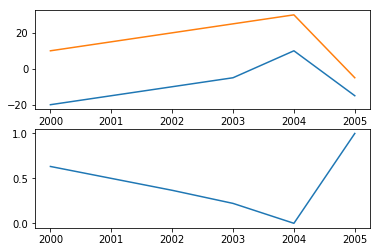

In [15]:
years = range(2000, 2006)
plt.subplot(211)
plt.plot(years, t_air_min, years, t_air_max)

plt.subplot(212)
plt.plot(years, fn)